In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/CS/Train1_Data.csv')

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/CS/Test1_Data.csv')

In [ ]:
train.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,0.000000,192.168.110.199,184.28.173.91,TCP,54,"61320 > 443 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0",Normal
1,2,1.221676,192.168.110.199,192.168.110.255,BROWSER,243,"Host Announcement DESKTOP-RV8E153, Workstation...",Normal
2,3,1.654345,4e:55:d5:0b:ff:e3,HonHaiPr_df:47:ab,ARP,42,Who has 192.168.110.199? Tell 192.168.110.38,Normal
3,4,1.654371,HonHaiPr_df:47:ab,4e:55:d5:0b:ff:e3,ARP,42,192.168.110.199 is at e4:d5:3d:df:47:ab,Anamoly
4,5,1.763027,184.28.173.91,192.168.110.199,TLSv1.2,85,Encrypted Alert,Anamoly


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137551 entries, 0 to 137550
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          137551 non-null  int64  
 1   Time         137551 non-null  float64
 2   Source       137551 non-null  object 
 3   Destination  137551 non-null  object 
 4   Protocol     137551 non-null  object 
 5   Length       137551 non-null  int64  
 6   Info         137551 non-null  object 
 7   Type         137551 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 8.4+ MB


In [ ]:
train.describe()

,No.,Time,Length
count,137551.000000,137551.000000,137551.000000
mean,68776.000000,274.593730,884.117520
std,39707.697776,46.059761,622.577012
min,1.000000,0.000000,42.000000
25%,34388.500000,238.902549,54.000000
50%,68776.000000,276.869302,1354.000000
75%,103163.500000,313.462750,1354.000000
max,137551.000000,360.135746,1354.000000


In [ ]:
train.describe(include='object')

,Source,Destination,Protocol,Info,Type
count,137551,137551,137551,137551,137551
unique,40,42,9,135447,2
top,34.104.35.123,192.168.110.199,TCP,Application Data,Anamoly
freq,86273,88712,136003,630,88779


In [ ]:
train.shape

(137551, 8)

In [ ]:
train.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
Type           0
dtype: int64

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='Type', ylabel='count'>

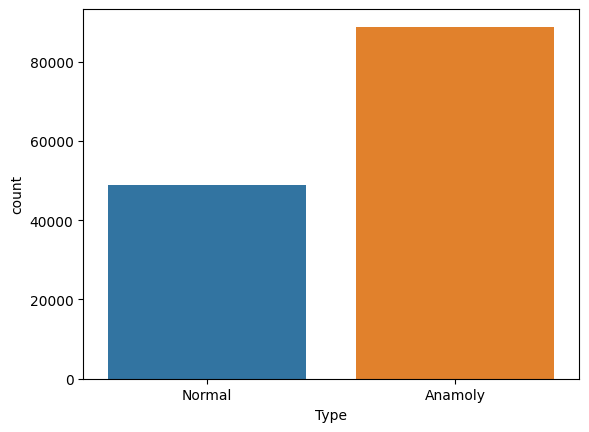

In [ ]:
sns.countplot(x=train['Type'])

In [ ]:
print('Class distribution Training set:')
print(train['Type'].value_counts())

Class distribution Training set:
Anamoly    88779
Normal     48772
Name: Type, dtype: int64


In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [ ]:

train.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type
0,1,0.000000,16,14,6,54,1482,1
1,2,1.221676,16,17,1,243,131026,1
2,3,1.654345,32,40,0,42,131255,1
3,4,1.654371,38,34,0,42,1,0
4,5,1.763027,15,16,7,85,131005,0


In [ ]:

X_train = train.drop(['Type'], axis=1)
Y_train = train['Type']

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features


['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']

In [ ]:
X_train = X_train[selected_features]


In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
x_train.shape

(96285, 7)

In [ ]:
x_test.shape

(41266, 7)

In [ ]:
y_train.shape

(96285,)

In [ ]:

y_test.shape

(41266,)

In [ ]:
import time

In [ ]:
from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.42557358741760254


In [ ]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.006940603256225586


In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.6788700212909591
Test Score: 0.6758590607279601


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.6 MB/s eta 0:00:00


In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9514370183686328], datetime_start=datetime.datetime(2023, 11, 11, 18, 31, 38, 782871), datetime_complete=datetime.datetime(2023, 11, 11, 18, 31, 59, 285059), params={'KNN_n_neighbors': 16}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")


Train Score: 0.9584255076076232
Test Score: 0.9514370183686328


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.28820347785949707


In [ ]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.008996963500976562


In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.9229874472931712], datetime_start=datetime.datetime(2023, 11, 11, 18, 33, 14, 843455), datetime_complete=datetime.datetime(2023, 11, 11, 18, 33, 15, 777657), params={'dt_max_depth': 32, 'dt_max_features': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=11, value=None)


In [ ]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 0.9628187152723685
Test Score: 0.9223089225997189


In [ ]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.958426 │     0.951437 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.67887  │     0.675859 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.962819 │     0.922309 │
╘═════════════════════╧═══════════════╧══════════════╛


In [ ]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc


In [ ]:


scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [ ]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 94.79 % +- 0.39

Mean recall: 
 93.46 % +- 0.42

**************** LogisticRegression Model Validation ****************
Mean precision: 
 52.68 % +- 0.29

Mean recall: 
 89.22 % +- 3.15

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 92.84 % +- 0.47

Mean recall: 
 92.56 % +- 0.51



<Axes: >

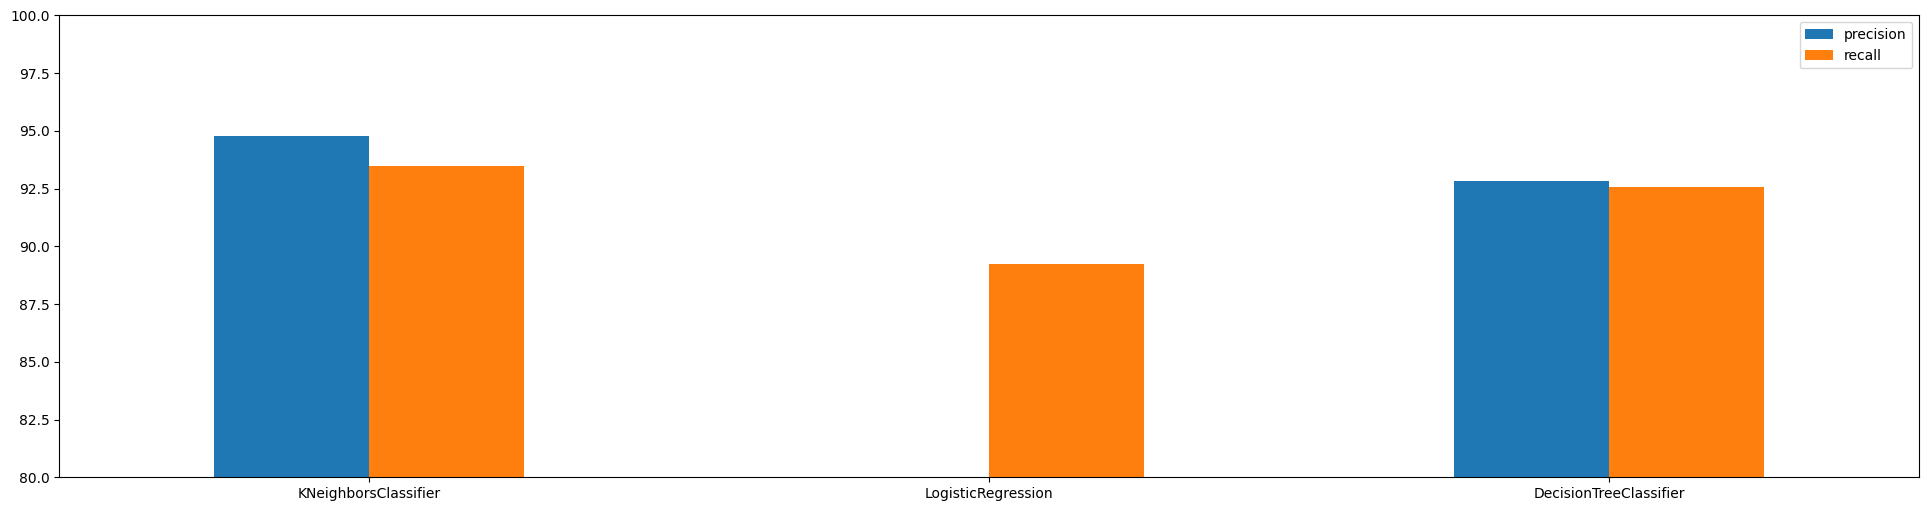

In [ ]:

for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [ ]:

models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc


In [ ]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[26086   735]
 [ 1007 13438]]
---------------
              precision    recall  f1-score   support

      normal       0.96      0.97      0.97     26821
     anamoly       0.95      0.93      0.94     14445

    accuracy                           0.96     41266
   macro avg       0.96      0.95      0.95     41266
weighted avg       0.96      0.96      0.96     41266

**************** LogisticRegression Model Testing ****************
[[14617 12204]
 [ 1172 13273]]
----------------
              precision    recall  f1-score   support

      normal       0.93      0.54      0.69     26821
     anamoly       0.52      0.92      0.66     14445

    accuracy                           0.68     41266
   macro avg       0.72      0.73      0.68     41266
weighted avg       0.78      0.68      0.68     41266

************** DecisionTreeClassifier Model Testing **************
[[25804  1017]
 [ 1105 13340]]
--------------
    

<Axes: >

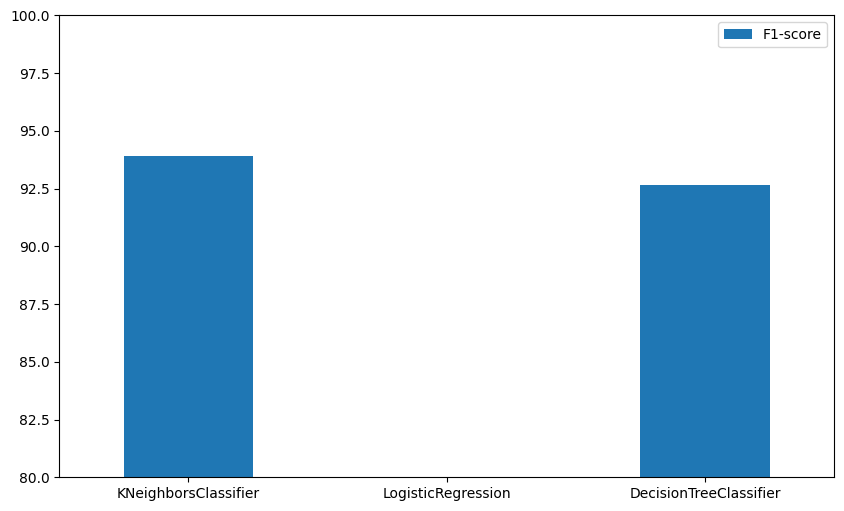

In [ ]:

f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)